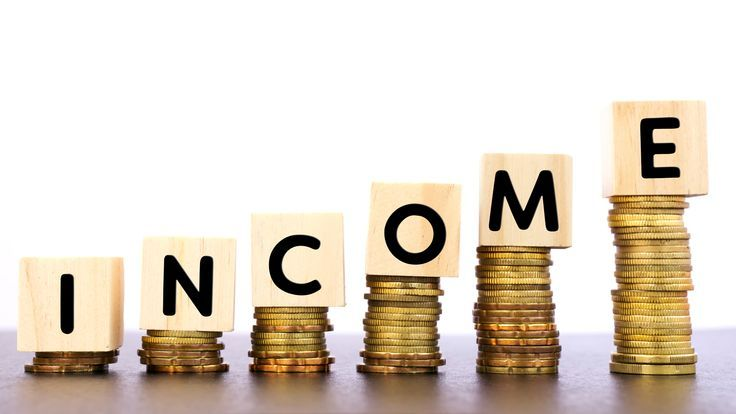

***About dataset;***

An individual’s annual income results from various factors. Intuitively, it is influenced by the individual’s education level, age, gender, occupation, and etc.

In [2]:
#Libraries

from zipfile import ZipFile as zp
import pandas as pd
import numpy as np
import missingno as ms
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
import warnings
warnings.filterwarnings("ignore")

In [3]:
dz = zp("/content/adult_income_dataset.zip")
data = pd.read_csv(dz.open("adult.csv"))
data_copy = data.copy()

In [4]:
data

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,48842.0,38.643585,13.710510,17.0,28.0,37.0,48.0,90.0
fnlwgt,48842.0,189664.134597,105604.025423,12285.0,117550.5,178144.5,237642.0,1490400.0
educational-num,48842.0,10.078089,2.570973,1.0,9.0,10.0,12.0,16.0
capital-gain,48842.0,1079.067626,7452.019058,0.0,0.0,0.0,0.0,99999.0
capital-loss,48842.0,87.502314,403.004552,0.0,0.0,0.0,0.0,4356.0
hours-per-week,48842.0,40.422382,12.391444,1.0,40.0,40.0,45.0,99.0


In [6]:
data.isnull().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
educational-num,0
marital-status,0
occupation,0
relationship,0
race,0
gender,0


In [7]:
data.isnull().sum() / len(data)

,0
age,0.0
workclass,0.0
fnlwgt,0.0
education,0.0
educational-num,0.0
marital-status,0.0
occupation,0.0
relationship,0.0
race,0.0
gender,0.0


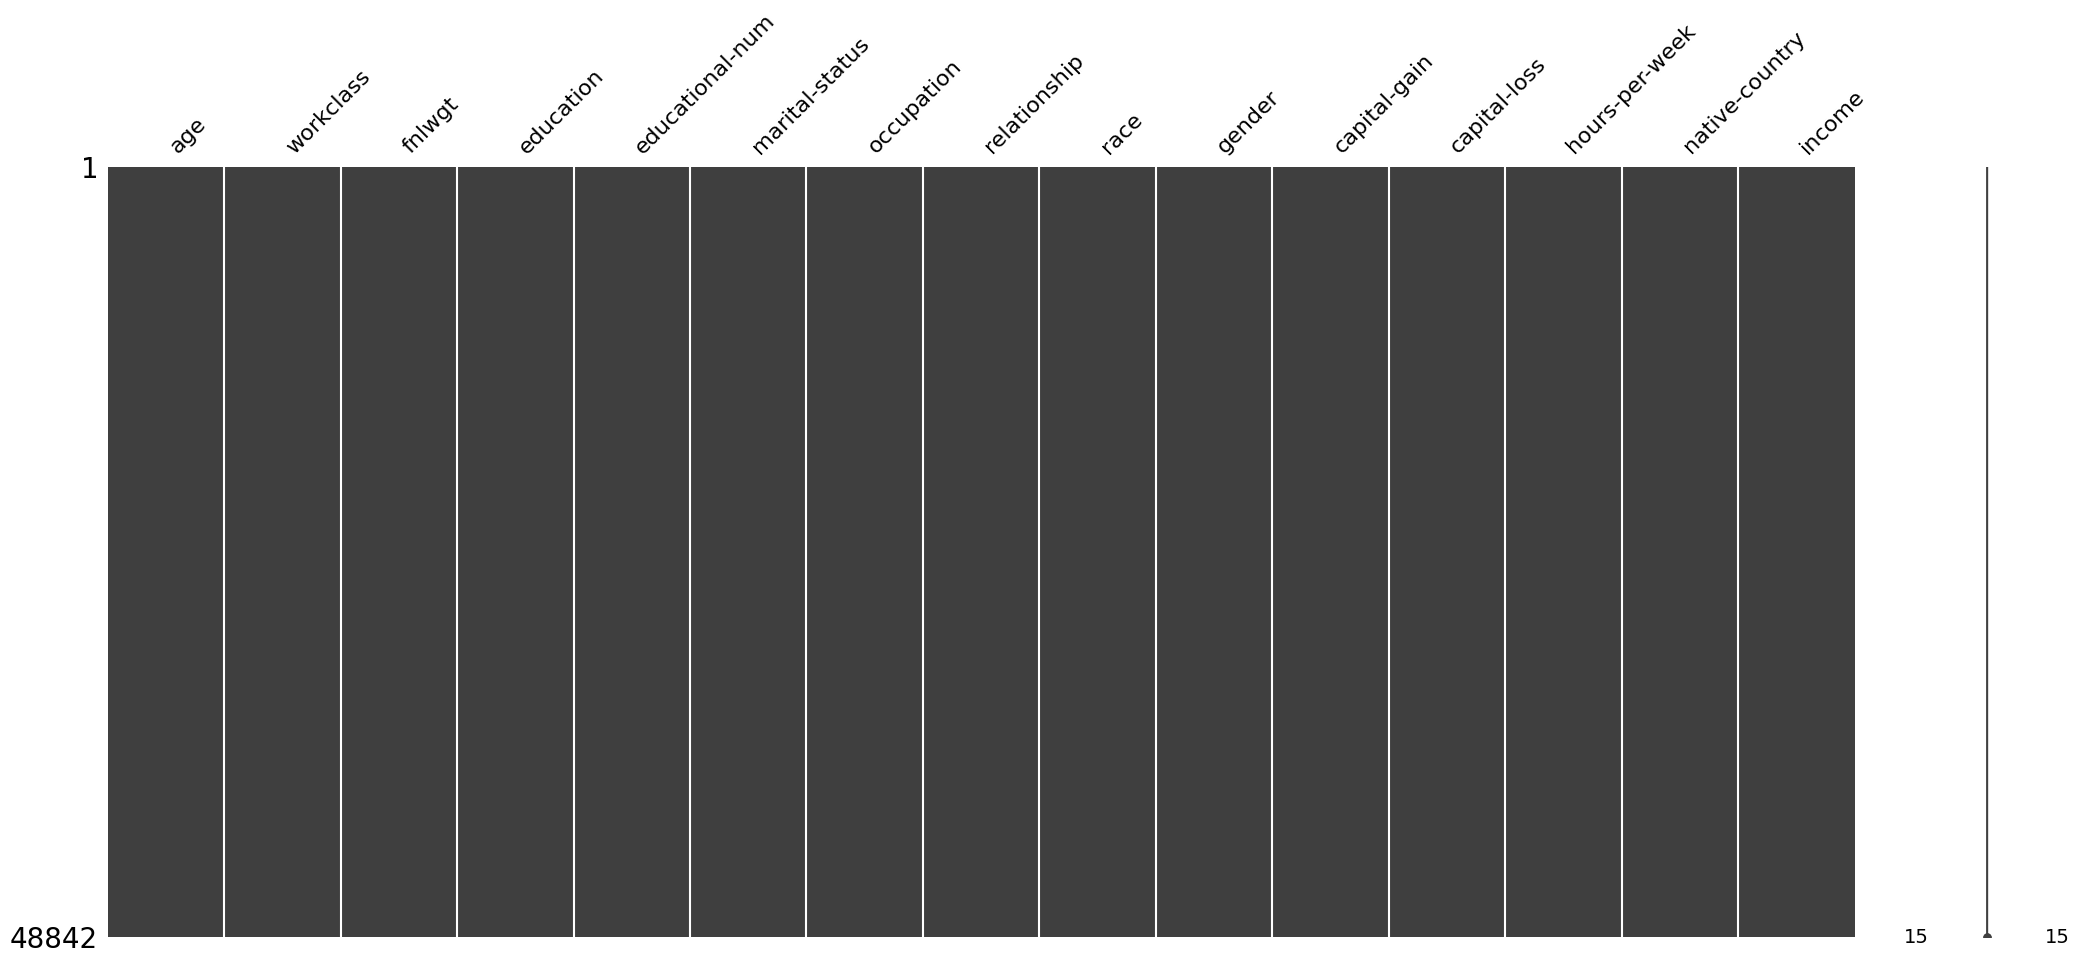

In [8]:
#visualize null values using missingno

ms.matrix(data)
plt.show()

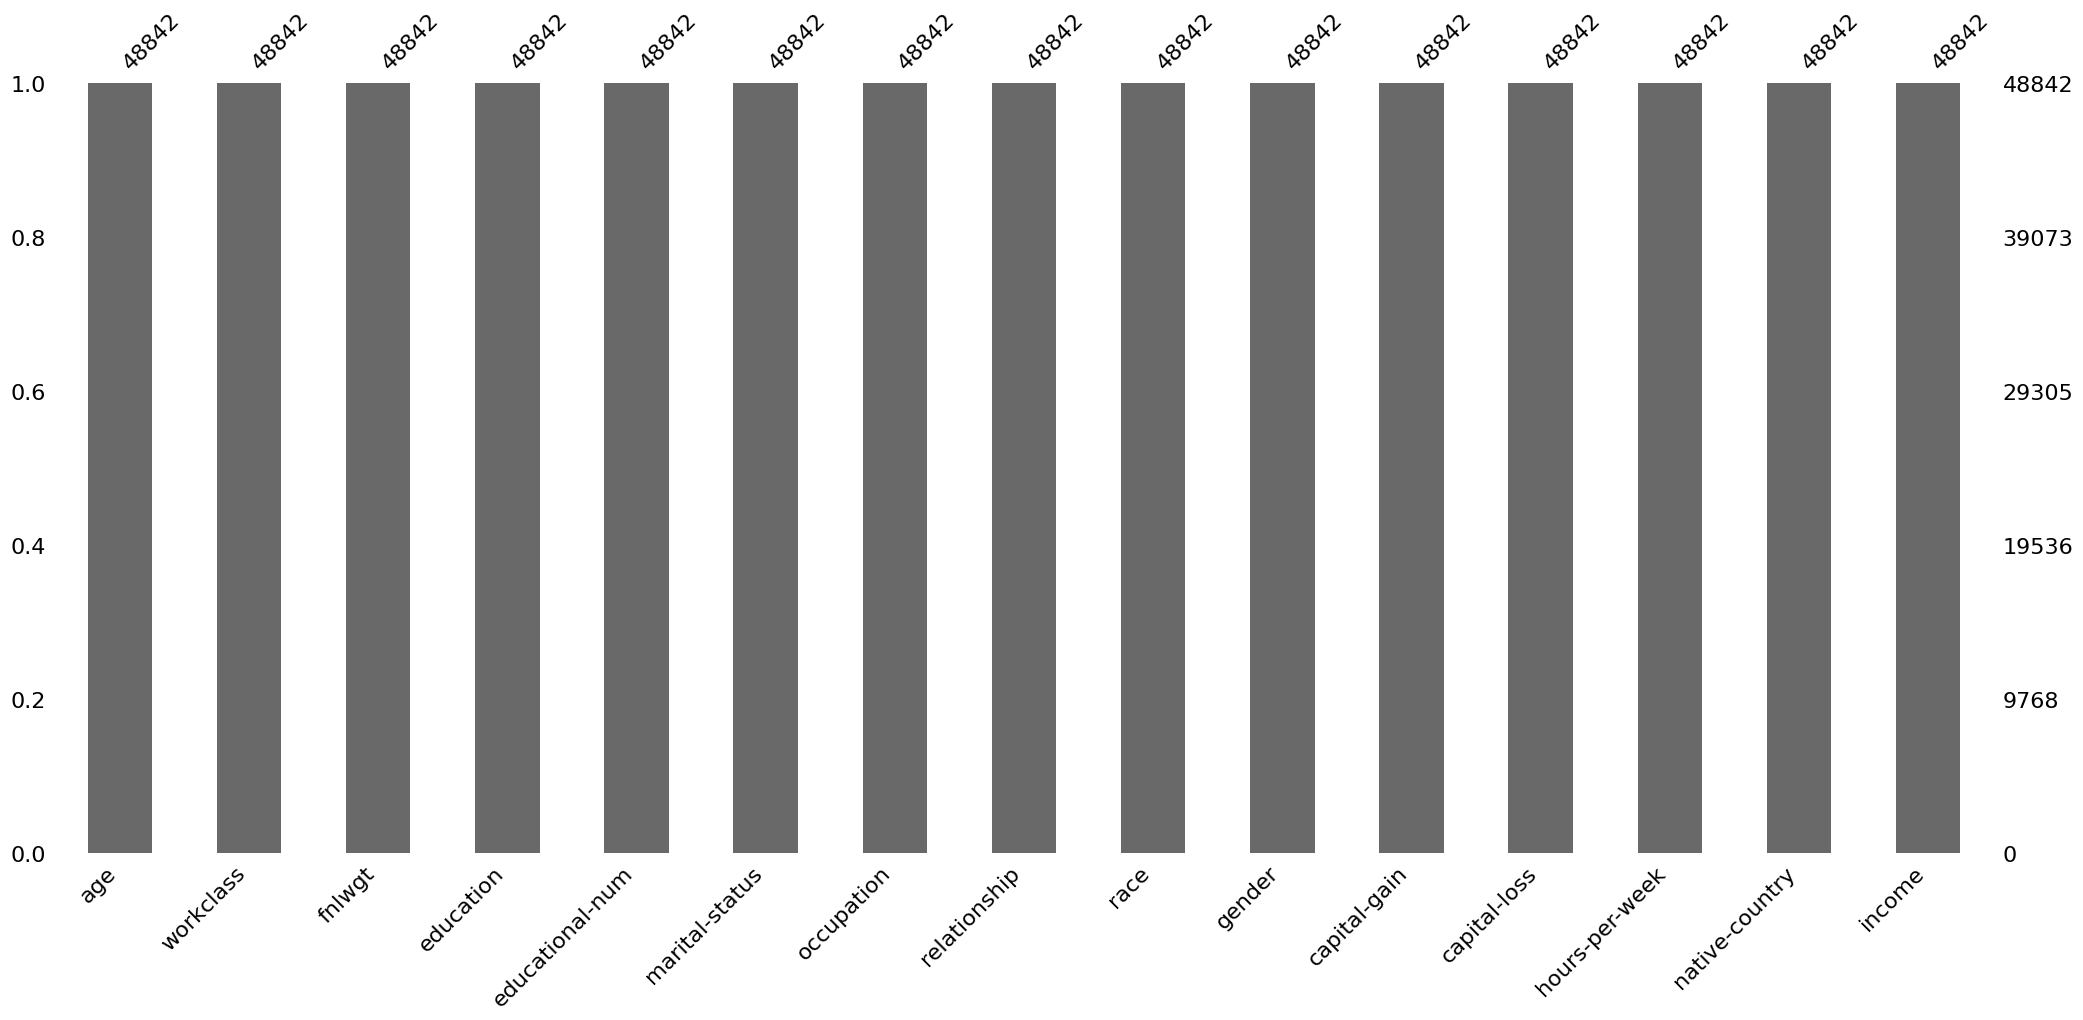

In [9]:
ms.bar(data)
plt.show()

we do not have any null value.


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64


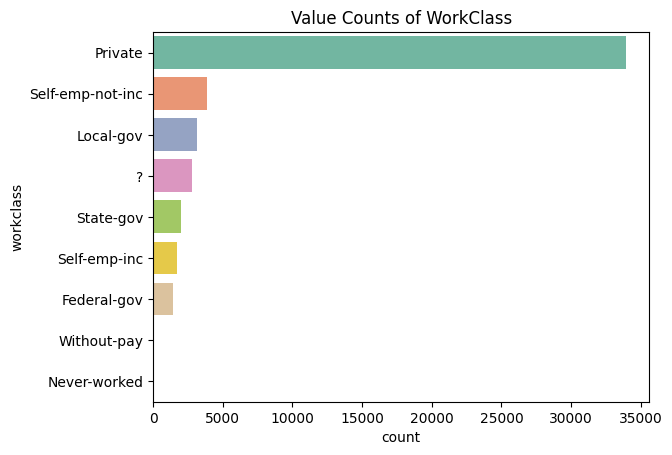

In [19]:
print(data["workclass"].value_counts())

#visualize

sorted = data["workclass"].value_counts().index
sns.countplot(data["workclass"], order = sorted, palette='Set2')
plt.title('Value Counts of WorkClass')
plt.show()

education
HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: count, dtype: int64


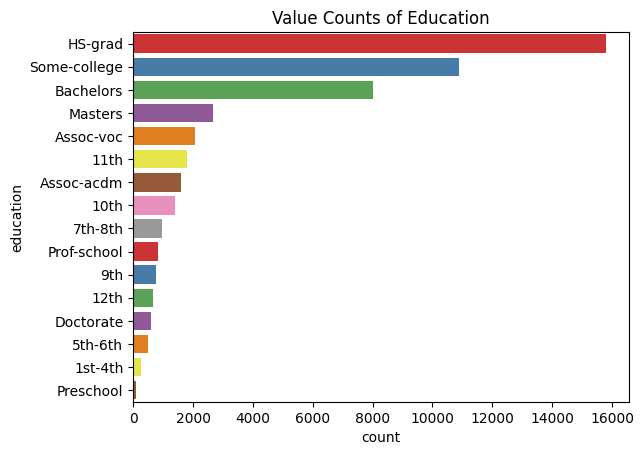

In [18]:
print(data["education"].value_counts())

#visualize

sorted = data["education"].value_counts().index
sns.countplot(data["education"], order = sorted, palette='Set1')
plt.title('Value Counts of Education')
plt.show()

occupation
Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
?                    2809
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: count, dtype: int64


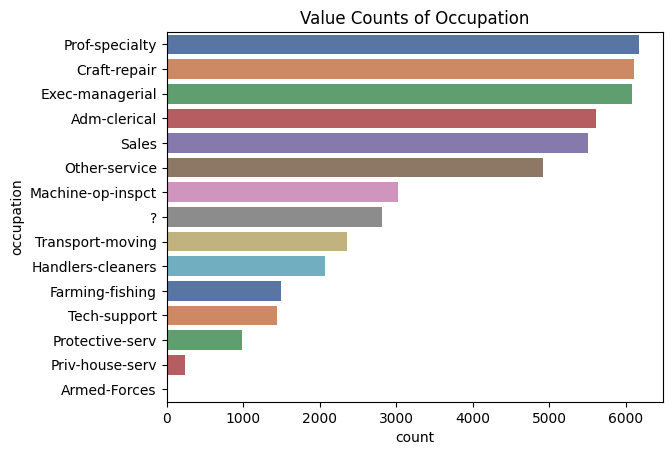

In [17]:
print(data["occupation"].value_counts())

#visualize

sorted = data["occupation"].value_counts().index
sns.countplot(data["occupation"], order = sorted, palette='deep')
plt.title('Value Counts of Occupation')
plt.show()

gender
Male      32650
Female    16192
Name: count, dtype: int64


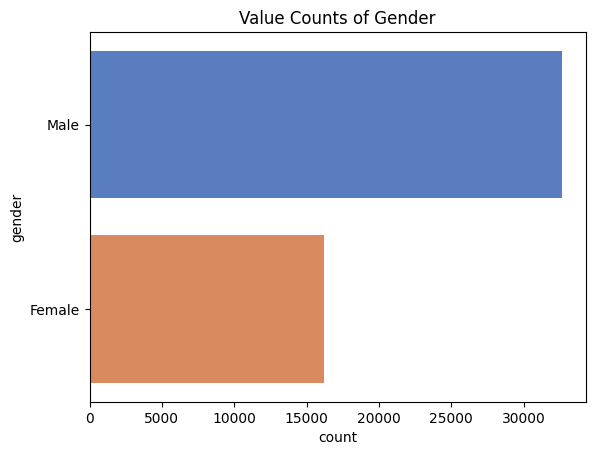

In [20]:
print(data["gender"].value_counts())

#visualize

sorted = data["gender"].value_counts().index
sns.countplot(data["gender"], order = sorted, palette='muted')
plt.title('Value Counts of Gender')
plt.show()

income
<=50K    37155
>50K     11687
Name: count, dtype: int64


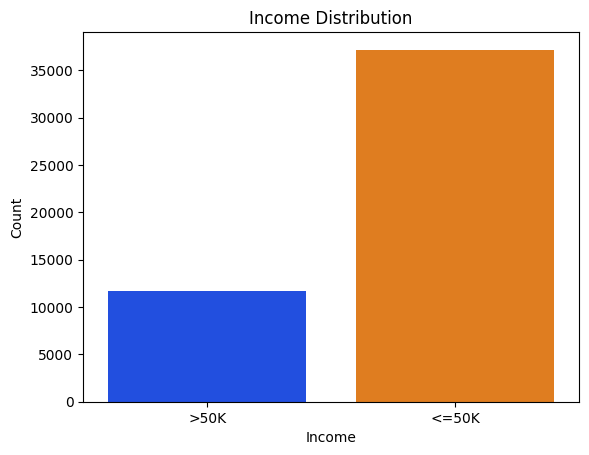

In [29]:
print(data["income"].value_counts())

# visualize
sorted = data["income"].value_counts().sort_values()

sns.barplot(x = sorted.index, y = sorted.values, palette = "bright")
plt.xlabel("Income")
plt.ylabel("Count")
plt.title("Income Distribution")
plt.show()

In [33]:
# Select only object (categorical) columns
objects = data.select_dtypes(include=['object'])
print(objects.columns)

Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'gender', 'native-country', 'income'],
      dtype='object')


In [36]:
for i in objects:
  le = LabelEncoder()
  data[i] = le.fit_transform(data[i])

data.head(10)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,4,226802,1,7,4,7,3,2,1,0,0,40,39,0
1,38,4,89814,11,9,2,5,0,4,1,0,0,50,39,0
2,28,2,336951,7,12,2,11,0,4,1,0,0,40,39,1
3,44,4,160323,15,10,2,7,0,2,1,7688,0,40,39,1
4,18,0,103497,15,10,4,0,3,4,0,0,0,30,39,0
5,34,4,198693,0,6,4,8,1,4,1,0,0,30,39,0
6,29,0,227026,11,9,4,0,4,2,1,0,0,40,39,0
7,63,6,104626,14,15,2,10,0,4,1,3103,0,32,39,1
8,24,4,369667,15,10,4,8,4,4,0,0,0,40,39,0
9,55,4,104996,5,4,2,3,0,4,1,0,0,10,39,0


0 if data["income"] <= 50K else 1

In [37]:
data.dtypes

,0
age,int64
workclass,int64
fnlwgt,int64
education,int64
educational-num,int64
marital-status,int64
occupation,int64
relationship,int64
race,int64
gender,int64


In [38]:
#Correlation

data.corr()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
age,1.000000,0.017526,-0.076628,-0.015058,0.030940,-0.263978,-0.014259,-0.263383,0.028421,0.088120,0.077229,0.056944,0.071558,-0.002861,0.230369
workclass,0.017526,1.000000,-0.016546,0.017187,0.055918,-0.068441,0.260005,-0.092365,0.052932,0.091223,0.036044,0.010880,0.141283,-0.008631,0.052674
fnlwgt,-0.076628,-0.016546,1.000000,-0.022570,-0.038761,0.029851,0.000860,0.009092,-0.027062,0.027739,-0.003706,-0.004366,-0.013519,-0.048680,-0.006339
education,-0.015058,0.017187,-0.022570,1.000000,0.359668,-0.037417,-0.020972,-0.010758,0.013250,-0.027041,0.028928,0.017638,0.057659,0.061469,0.080091
educational-num,0.030940,0.055918,-0.038761,0.359668,1.000000,-0.069992,0.112265,-0.090534,0.029239,0.009328,0.125146,0.080972,0.143689,0.049107,0.332613
marital-status,-0.263978,-0.068441,0.029851,-0.037417,-0.069992,1.000000,-0.017179,0.187800,-0.070104,-0.127479,-0.043969,-0.033872,-0.185567,-0.021375,-0.199072
occupation,-0.014259,0.260005,0.000860,-0.020972,0.112265,-0.017179,1.000000,-0.076356,0.005671,0.075081,0.024163,0.017180,0.079986,-0.013424,0.076722
relationship,-0.263383,-0.092365,0.009092,-0.010758,-0.090534,0.187800,-0.076356,1.000000,-0.117041,-0.579797,-0.056510,-0.057201,-0.250400,-0.003962,-0.253214
race,0.028421,0.052932,-0.027062,0.013250,0.029239,-0.070104,0.005671,-0.117041,1.000000,0.086734,0.011581,0.018595,0.039694,0.138231,0.070934
gender,0.088120,0.091223,0.027739,-0.027041,0.009328,-0.127479,0.075081,-0.579797,0.086734,1.000000,0.047094,0.045480,0.228560,-0.009780,0.214628


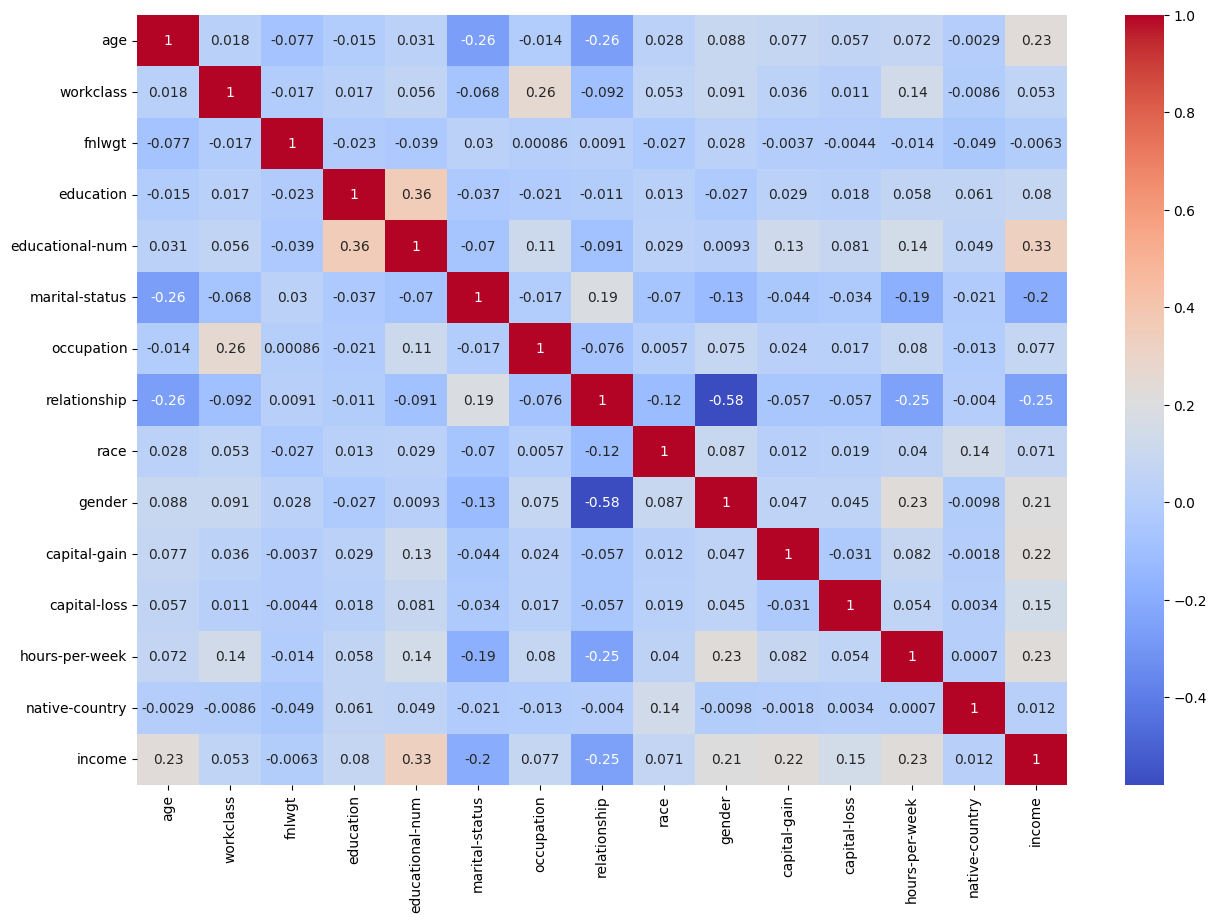

In [39]:
#Correlation using heatmap

plt.figure(figsize=(15,10))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.show()

In [47]:
#splitting data

X = data.drop(columns=["income"], axis = 1)
y = data["income"]

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [48]:
#feature scaling

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [49]:
#model

model = RandomForestClassifier()
model.fit(x_train, y_train)

pred = model.predict(x_test)

In [53]:
model.score(x_train, y_train)

0.999872034397154

Accuracy: 86.54
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.93      0.91      7479
           1       0.75      0.65      0.69      2290

    accuracy                           0.87      9769
   macro avg       0.82      0.79      0.80      9769
weighted avg       0.86      0.87      0.86      9769



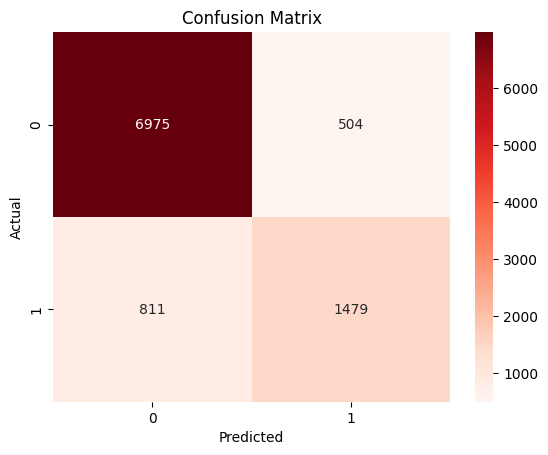

In [50]:
# Evaluation

print("Accuracy:", round(accuracy_score(y_test, pred) * 100, 2))
print(f"Classification Report:\n {classification_report(y_test, pred)}")

cm = confusion_matrix(y_test, pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

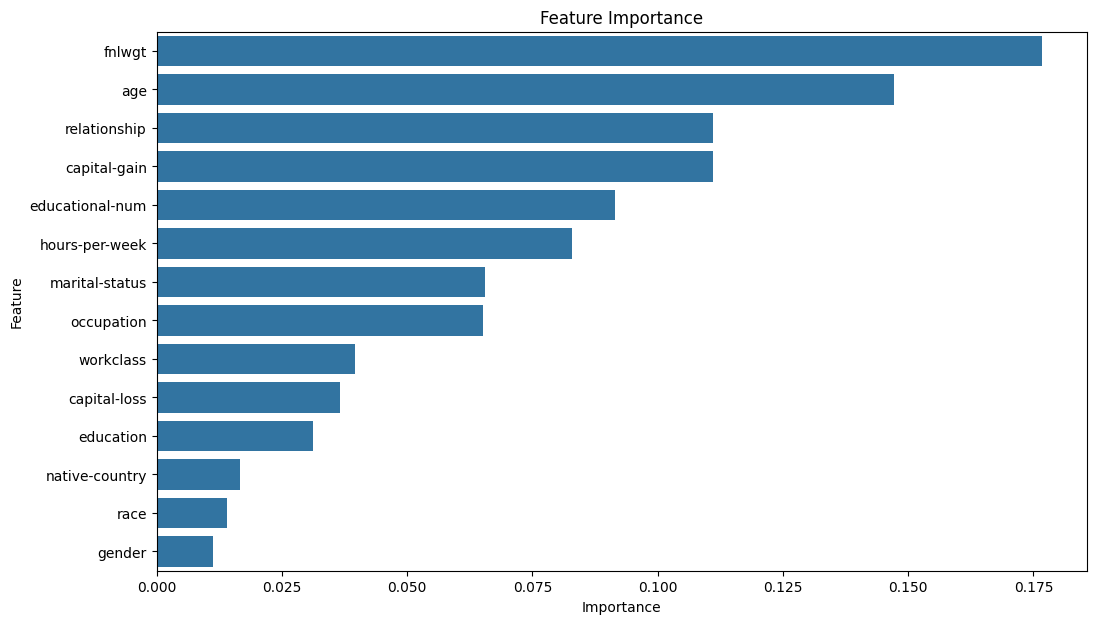

In [51]:
# Feature Importance
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': model.feature_importances_})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12,7))
sns.barplot(x = 'Importance', y = 'Feature', data = feature_importance)
plt.title('Feature Importance')
plt.show()

In [55]:
#Hyperparameter tuning

params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 4],
    'max_features': ['sqrt', 'log2']
}

grid = GridSearchCV(estimator = model, param_grid = params, cv=5)
grid.fit(x_train, y_train)

best_params = grid.best_params_
print("Best Hyperparameters: {}".format(best_params))

Best Hyperparameters: {'max_depth': 20, 'max_features': 'log2', 'min_samples_split': 2, 'n_estimators': 200}


Final Model Accuracy: 86.96


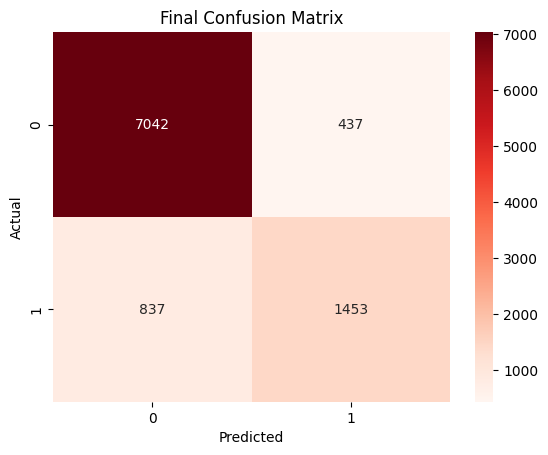

In [57]:
# Best Params

best_model = grid.best_estimator_
best_pred = best_model.predict(x_test)
print("Final Model Accuracy:", round(accuracy_score(y_test, best_pred) * 100, 2))

#Final Confusion matrix

cm = confusion_matrix(y_test, best_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Final Confusion Matrix')
plt.show()